# Part II - (Prosper Loan Dataset Investigation)
## by (Bruce Mahagwa)

## Investigation Overview

This analysis sought to discover how well Prosper Bank handled its accounts during the period under the investigation. It also sought to investigate the costs of borrowing at Prosper Bank as well as how much delinquency is usually evident. Lastly, it sought to investigate the occurrence of delinquency under different income groups.
## Key Insights
1. Prosper bank is good at handling its accounts because most of their loan accounts are either being currently serviced or are completed. Additionally, the accounts that are delinquent have low delinquent amounts of less than 10,000 dollars.
2. As the cost of borrowing increases, it is very likely that there will be more delinquent accounts. This observation is supported by the fact that as one borrows large sums of money at Prosper Bank, the Borrower Rate reduces. Since the bulk of accounts at Prosper Bank have low loan amounts, the loanees pay a high Borrower Rate and thus are more likely to have more delinquent accounts. 
3. Customers at Prosper Bank under the "Not displayed" income group have the least amount of money delinquent whereas those with the 100, 000 dollar income group have one of the highest amounts of money delinquent.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df_prosper_loan = pd.read_csv("prosperLoanData.csv");

## (Visualization(s) 1)

This univariate visualization shows that Prosper Bank is really good at handling their accounts since they have most loan accounts either being completed or current. The second one under this category shows that most clients have zero delinquent accounts.


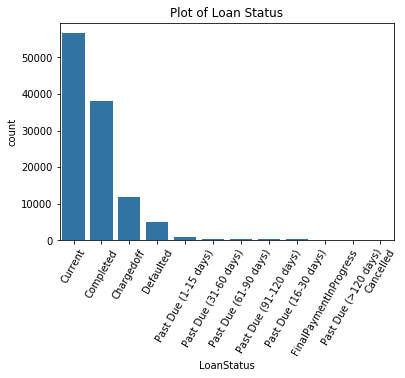

In [4]:
# we use seaborn's countplot function to create a bar chart
base_color = sb.color_palette()[0]
def plot_univariate_bar_chart(x, y):
    base_color = sb.color_palette()[0]
    freq = df_prosper_loan[x].value_counts()
    gen_order = freq.index
    sb.countplot(data = df_prosper_loan, x = x, color = base_color, order = gen_order).set(title = y);
    plt.xticks(rotation = 60);
plot_univariate_bar_chart("LoanStatus", "Plot of Loan Status");

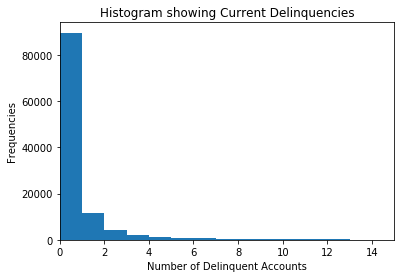

In [5]:
bins = np.arange(0, df_prosper_loan["CurrentDelinquencies"].max() + 1, 1)
chosen_columns = df_prosper_loan[["CurrentDelinquencies"]];
df_clean = chosen_columns.copy()
df_clean.dropna(inplace = True)
# df_clean.info()
plt.xlim(0, 15)
plt.hist(data = df_clean, x = "CurrentDelinquencies", bins = bins);
plt.title("Histogram showing Current Delinquencies")
plt.ylabel("Frequencies")
plt.xlabel("Number of Delinquent Accounts");

## (Visualization 2)
These plots shows that as the cost of borrowing(BorrowerAPR) increases, Current Delinquencies increase. This observation is supported by the fact that most loanees at Prosper Bank take loans under 10,000 dollars which attract high BorrowerAPR. Also, as the loan amount increases the Borrower Rate reduces.

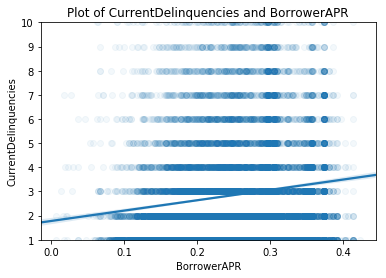

In [6]:
df_clean_new = df_prosper_loan.copy()
df_clean_new = df_clean_new[df_clean_new["CurrentDelinquencies"] > 0]
sb.regplot(data = df_clean_new, y = "CurrentDelinquencies", x = "BorrowerAPR", scatter_kws={"alpha": 1/20});
plt.ylim(1, 10)
plt.title("Plot of CurrentDelinquencies and BorrowerAPR");

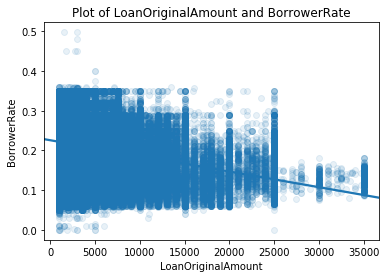

In [7]:
df_clean_new = df_prosper_loan.copy()
def func_scatter(x, y, z):
    sb.regplot(data = z, x = x, y = y, x_jitter = 0.3, scatter_kws={"alpha": 2/20});
    plt.title("Plot of " + x + " and " + y)
func_scatter("LoanOriginalAmount", "BorrowerRate", df_clean_new)

## (Visualization 3)
Surprisingly, customers who have income ranges as "Not displayed", "Not employed", and "$0" have the lowest amounts delinquent whereas those with an income of $100,000+ have the highest amounts delinquent.

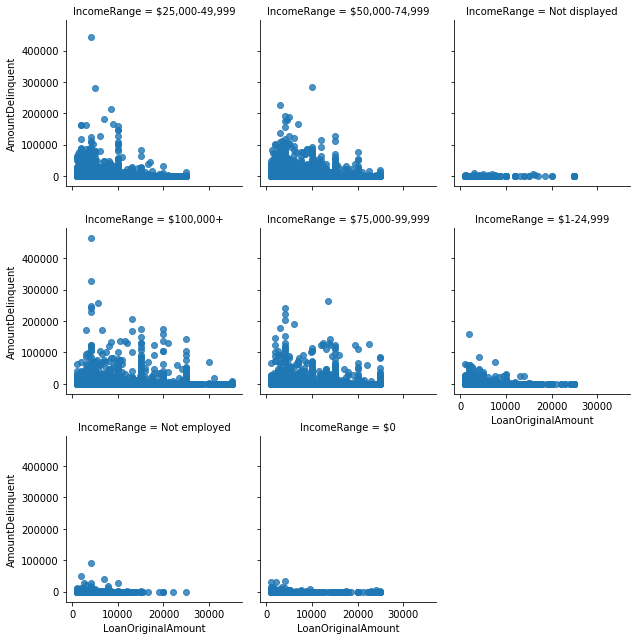

In [8]:
g = sb.FacetGrid(data = df_prosper_loan, col = "IncomeRange", margin_titles = True, col_wrap = 3);
g.map(sb.regplot, "LoanOriginalAmount", "AmountDelinquent", fit_reg = False, x_jitter = 0.5);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Prosper_Loan Data Exploration Part 2.ipynb --to slides --post serve --no-input --no-prompt